In [1]:
import os
import sys
sys.path.append('../../..')

import numpy as np
import pickle
from metabatt.utils import get_input_count
from metabatt.graph import Graph, Edge, Subgraphs
from metabatt.reinforce.environments import MetabattEnvSubgraphs
from metabatt.reinforce.agents import QAgentReplayMemory

In [2]:
# with open(f"best_graph.pickle", "rb") as input_file:
#      state_dic = pickle.load(input_file)
        
# vars_dic = state_dic['vars']
# loaded_graph = Graph(vars_dic['n_cells_w'],
#           vars_dic['n_cells_h'],
#           vars_dic['max_edge_length'],
#           pbc=vars_dic['pbc'],
#           cell=vars_dic['cell'])
# loaded_graph.nodes = state_dic['vars']['nodes']
# loaded_graph._edges = state_dic['vars']['_edges']
# loaded_graph.x_size = vars_dic['x_size']
# loaded_graph.y_size = vars_dic['y_size']
        
# edge = loaded_graph._edges['0-1'].pop()
# print(loaded_graph._edges)

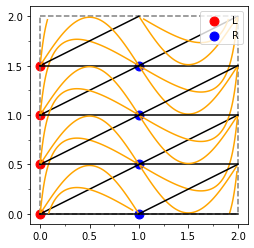

In [3]:
graph = Graph.load_graph_state('best_graph')
#for edge in test.edges:
#    print(f"[{edge.node1.position[0]:.3f}, {edge.node1.position[1]:.3f}]({edge.node1.rot_direction}) => [{edge.node2.position[0]:.3f}, {edge.node2.position[1]:.3f}]({edge.node2.rot_direction})")
graph.bend_edges()
graph.plot()

In [4]:
area = graph.x_size * graph.y_size
reward = graph.total_edge_length()/area
print(f"{reward=}")

graph.total_edge_length()
# area

reward=4.240000000000001


16.960000000000004

In [5]:
lengths = [1.0, 1.118033988749895]
angles = [0, 26.565051177077994]
n_inputs = get_input_count(angles)
# we start from scratch here
subgraphs = Subgraphs(angles=angles,
                      lengths=lengths)

# create the environment
env = MetabattEnvSubgraphs(n_cells_x=3,
                           n_cells_y=3,
                           subgraphs=subgraphs)